ChEn-3170: Computational Methods in Chemical Engineering Spring 2024 UMass Lowell; Prof. V. F. de Almeida **26Mar24**

# 11. Arrhenius Rate Constant Data Fitting
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Arrhenius Data Fitting](#adf)
* [Experimental Data (10 points)](#ed10)
  - [Linear System](#ls10)
  - [LS Data Fitting](#lsdf10)
  - [Goodness of Fit](#gof10)
  - [LS Residual](#lsr10)
* [Experimental Data (20 points)](#ed20)
  - [Linear System](#ls20)
  - [LS Data Fitting](#lsdf20)
  - [Goodness of Fit](#gof20)
  - [LS Residual](#lsr20)
* [Experimental Data (80 points)](#ed80)
  - [Linear System](#ls80)
  - [LS Data Fitting](#lsdf80)
  - [Goodness of Fit](#gof80)
  - [LS Residual](#lsr80)
* [Results Comparison](#res)
---

## [Introduction](#toc)<a id="intro"></a>
The least squares method has a long history in data fitting. The theoretical notes we will need for this topic can be found in the course notes OneNote [ChEn-3170-lsq](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EvnXGC1ldXBOkgzj_LwKL0kBfvHwag6-wySjHqH8R8y3ng?e=S373Vo). 

## [Arrhenius Data Fitting](#toc)<a id="adf"></a>
This notebook will apply the previous developments in the course to fit experimental data to a model. Here the example is the Arrhenius expression for the dependency of the reaction rate constant on temperature, namely

\begin{equation*}
k(T) = k_0 \, e^{-\frac{E_\text{a}}{R\,T}}.
\end{equation*}

The pre-exponential factor (frequency parameter), $k_0$, and the energy of activation, $E_\text{a}$, are the sought parameters in this expression. The linear least squares method for finding the optimal values of $k_0$ and $E_\text{a}$ can only be used for a linear relationship between the parameters. This can be obtained by taking the natural logarithm of the Arrhenius expression to give

\begin{equation*}
\ln k = \ln k_0 - \frac{E_\text{a}}{R\,T}.
\end{equation*}

In this transformed form, the sought parameters are now $\ln k_0$ and $E_\text{a}$. We will define the coldness variable, $\beta = \frac{1}{R\,T}$, hence

\begin{equation*}
\ln k = \ln k_0 - \beta\,E_\text{a}.
\end{equation*}

Therefore the problem at hand is to find the *optimum* values of the parameters $\ln k_0$ and $E_\text{a}$ for a given set of data points $\bigl(\ln k_i, \beta_i\bigr)$ for $i=1,\ldots,m$ which results into a system of linear algebraic equations

\begin{equation*}
\ln k_i = \ln k_0 - \beta_i\,E_\text{a} \quad\ \forall \quad\ i=1,\ldots,m.
\end{equation*}

The corresponding matrix system is

\begin{equation*}
 \begin{pmatrix}
  1 & -\beta_1  \\
  1 & -\beta_2 \\
  \vdots  & \vdots \\
  1 & -\beta_m
 \end{pmatrix} 
 \,
 \begin{pmatrix}
  \ln k_0 \\ 
  E_\text{a}  
 \end{pmatrix}
=
\begin{pmatrix}
 \ln k_1 \\ 
 \ln k_2 \\ 
 \vdots  \\ 
 \ln k_m \\ 
\end{pmatrix}
\end{equation*}

or

\begin{equation*}
\Amtrx\,\xvec = \bvec ,
\end{equation*}

where $\Amtrx =  \begin{pmatrix}
  1 & -\beta_1  \\
  1 & -\beta_2 \\
  \vdots  & \vdots \\
  1 & -\beta_m
 \end{pmatrix}$, 
 $\xvec =  \begin{pmatrix}
  \ln k_0 \\ 
  E_\text{a}  
 \end{pmatrix}$, 
and 
$\bvec = \begin{pmatrix}
 \ln k_1 \\ 
 \ln k_2 \\ 
 \vdots  \\ 
 \ln k_m \\ 
\end{pmatrix} $.

Since $\Amtrx$ is full rank when $\beta$'s are distinct, the least squares solution is unique and provides the *optimal* value of the parameters $\xvec$. Therefore solve the normal equations

\begin{equation*}
\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec .
\end{equation*}

The least squares solution $\xvec_\text{LS}$ gives the optimal values of the coefficients $\ln k_0$ and $E_\text{a}$ for the Arrhenius fit.

## [Experimental Data (10 points)](#toc)<a id="ed10"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/tree/master/notebooks/data). The data is organized in two columns of $T$ versus $k$. For example `data/k_x_T_10pts.dat`:

Try (Mac OS and Linux):
```python
!cat 'data/k_x_T_10pts.dat'
```
to get:


    #(T,k) [K x 1/s]
    r_cte = 8.314 [J/(mol.K)]
    n_pts = 10
    3.00000e+02 6.40139e-01
    3.22222e+02 6.45948e-01
    3.44444e+02 6.74428e-01
    3.66667e+02 6.74221e-01
    3.88889e+02 7.08469e-01
    4.11111e+02 6.99721e-01
    4.33333e+02 6.89508e-01
    4.55556e+02 7.02169e-01
    4.77778e+02 7.53651e-01
    5.00000e+02 7.60534e-01

In [1]:
!cat 'data/k_x_T_10pts.dat'

#(T,k) [K x 1/s]
r_cte = 8.314 [J/(mol.K)]
n_pts = 10
3.00000e+02 6.40139e-01
3.22222e+02 6.45948e-01
3.44444e+02 6.74428e-01
3.66667e+02 6.74221e-01
3.88889e+02 7.08469e-01
4.11111e+02 6.99721e-01
4.33333e+02 6.89508e-01
4.55556e+02 7.02169e-01
4.77778e+02 7.53651e-01
5.00000e+02 7.60534e-01


In [3]:
'''Function: read experimental data'''

def read_experimental_data(filename):
    
    import io                     # import io module
    finput = open(filename, 'rt') # create file object

    import numpy as np

    for line in finput:
    
        line = line.strip() # original line
    
        if line[0] == '#': # skip comments in the file
            continue
        
        var_line = line.split(' = ') # variable line
    
        if var_line[0] == 'r_cte':
            r_cte = float(var_line[1].split(' ')[0])
            r_cte_units = var_line[1].split(' ')[1]
        elif var_line[0] == 'n_pts':
            n_pts = int(var_line[1])
            temp  = np.zeros(n_pts) # reserve space
            k_cte = np.zeros(n_pts) # reserve space
            idx   = 0 # counter
        else:
            data = line.split(' ') # original line
            temp[idx]  = float(data[0])
            k_cte[idx] = float(data[1])
            idx += 1
            
    return (r_cte, r_cte_units, n_pts, temp, k_cte)

In [4]:
'''Read experimental data'''

import numpy as np
(r_cte, r_cte_units, n_pts, temp_vec, k_cte_vec) = read_experimental_data('data/k_x_T_10pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp_vec)
print('k =', k_cte_vec)

R = 8.314 [J/(mol.K)]
m =  10
T = [300.   322.22 344.44 366.67 388.89 411.11 433.33 455.56 477.78 500.  ]
k = [0.64 0.65 0.67 0.67 0.71 0.7  0.69 0.7  0.75 0.76]


In [5]:
'''Function: plot experimental data'''

def plot_experimental_data(temp, k_cte):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.style.use('dark_background')
    #plt.style.use('classic')

    plt.figure(1, figsize=(9, 5))

    plt.plot(temp, k_cte,'r*',label='experimental', markersize=10)
    
    plt.xlabel(r'$T$ [K]',fontsize=14)
    plt.ylabel(r'$k$ [s$^{-1}$]',fontsize=14)
    plt.title('Arrhenius Rxn Rate Constant Data',fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.grid(True)
    plt.show()
    
    return

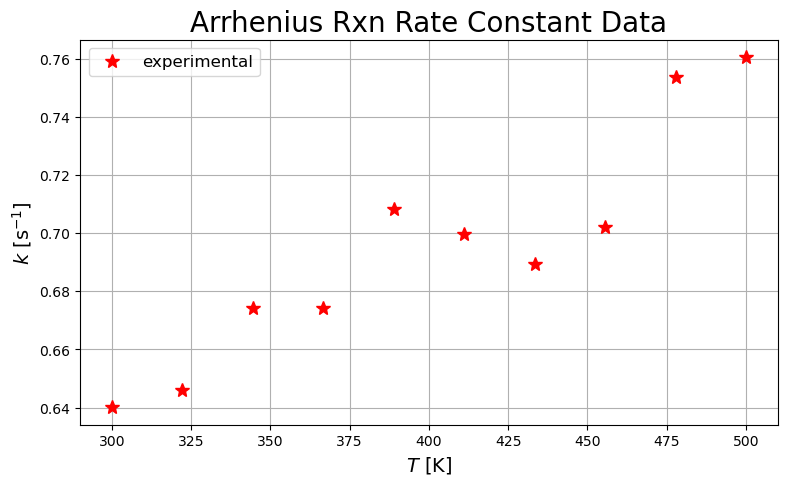

In [6]:
'''Plot experimental data'''

plot_experimental_data(temp_vec, k_cte_vec)

### [Linear System](#toc)<a id="ls10"></a>
Let's build the matrix system:

\begin{equation*}
\Amtrx\,\xvec = \bvec ,
\end{equation*}

where $\Amtrx =  \begin{pmatrix}
  1 & -\beta_1  \\
  1 & -\beta_2 \\
  \vdots  & \vdots \\
  1 & -\beta_m
 \end{pmatrix}$, 
 $\xvec =  \begin{pmatrix}
  \ln k_0 \\ 
  E_\text{a}  
 \end{pmatrix}$, 
and 
$\bvec = \begin{pmatrix}
 \ln k_1 \\ 
 \ln k_2 \\ 
 \vdots  \\ 
 \ln k_m \\ 
\end{pmatrix} $.

In [7]:
'''Function: build the matrix system'''

def build_linear_system(r_cte, temp, k_cte):
    
    import numpy as np
    
    b_vec = np.log(k_cte)
    m_pts = b_vec.size

    a_mtrx = np.ones((m_pts,2)) # initialize matrix
    
    beta_vec = 1/temp/r_cte
    a_mtrx[:,1] = - beta_vec
    
    return (a_mtrx, b_vec)

In [8]:
'''Build the matrix system'''

(a_mtrx, b_vec) = build_linear_system(r_cte, temp_vec, k_cte_vec)

print('a_mtrx =\n',a_mtrx)
print('b_vec =',b_vec)

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

print('My rank(A) =',matrix_rank(a_mtrx, tol=1e-5))
print('NumPy rank(A) =',np.linalg.matrix_rank(a_mtrx))

a_mtrx =
 [[ 1.00e+00 -4.01e-04]
 [ 1.00e+00 -3.73e-04]
 [ 1.00e+00 -3.49e-04]
 [ 1.00e+00 -3.28e-04]
 [ 1.00e+00 -3.09e-04]
 [ 1.00e+00 -2.93e-04]
 [ 1.00e+00 -2.78e-04]
 [ 1.00e+00 -2.64e-04]
 [ 1.00e+00 -2.52e-04]
 [ 1.00e+00 -2.41e-04]]
b_vec = [-0.45 -0.44 -0.39 -0.39 -0.34 -0.36 -0.37 -0.35 -0.28 -0.27]
My rank(A) = 2
NumPy rank(A) = 2


### [LS Data Fitting](#toc)<a id="lsdf10"></a>

Let's build the LS normal equations and solve

\begin{equation*}
\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec .
\end{equation*}

The least squares solution $\xvec_\text{LS}$ gives the optimal values of the coefficients $\ln k_0$ and $E_\text{a}$ for the Arrhenius fit.

In [9]:
'''Build and solve the normal equations'''

try:
    from chen_3170.toolkit import solve
    from chen_3170.toolkit import shortest_least_squares_solve
except ModuleNotFoundError:
    assert False, 'You need to provide your own solve function here. Bailing out.'

x_vec = solve(a_mtrx.transpose() @ a_mtrx, a_mtrx.transpose() @ b_vec,
              pivoting_option='partial', pivot_tol=1e-8)

#x_vec = universal_solve(a_mtrx, b_vec, pivot_tol=1e-8)

np.set_printoptions(precision=3, threshold=100, edgeitems=3)
print('x_vec =', x_vec)

print('||x_vec - NumPy x_vec|| = %1.3e' %
      np.linalg.norm(x_vec - np.linalg.solve(a_mtrx.transpose() @ a_mtrx,
                                             a_mtrx.transpose() @ b_vec)))

import math

k_0 = math.exp(x_vec[0])
energy_a = x_vec[1]

print('k_0 = %8.5e [1/s]' % k_0)
print('E_a = %8.5e [J/mol]' % energy_a)

x_vec = [-6.425e-02  9.758e+02]
||x_vec - NumPy x_vec|| = 3.183e-12
k_0 = 9.37772e-01 [1/s]
E_a = 9.75755e+02 [J/mol]


In [10]:
'''Function: plot the fit in the transformed plane'''

def plot_fit_transformed(r_cte, temp, k_cte, k_0, energy_a):

    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.style.use('dark_background')
    #plt.style.use('classic')

    plt.figure(2, figsize=(9, 5))

    # plot experimental data
    beta_expt = 1.0 / r_cte / temp

    plt.plot(beta_expt * 1e+3, np.log(k_cte), 'r*', label='experimental', markersize=10)

    # plot Arrhenius expression
    n_plot_pts = 100
    temp_plot = np.linspace(temp[0], temp[-1], n_plot_pts)
    beta_plot = 1.0 / temp_plot / r_cte
    ln_k_plot = math.log(k_0) - beta_plot * energy_a  # logarithm of Arrhenius expression

    plt.plot(beta_plot * 1e+3, ln_k_plot, '-', color='black', label='LS fitting')

    plt.xlabel(r'$\beta$ [$10^{-3}$ mol/J]', fontsize=16)
    plt.ylabel('ln k [ ]', fontsize=16)
    plt.title('Arrhenius Rxn Rate Constant Data', fontsize=20)

    (x_min, x_max) = plt.xlim()
    dx = abs(x_max - x_min)
    x_text = x_min + dx * 0.05

    (y_min, y_max) = plt.ylim()
    dy = abs(y_max - y_min)
    y_text = y_min + dy * 0.05

    plt.text(x_text,
             y_text,
             r'$k_0=$%8.2e [1/s],   $E_a$=%8.2e [J/mol]' % (k_0, energy_a),
             fontsize=16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()

    return

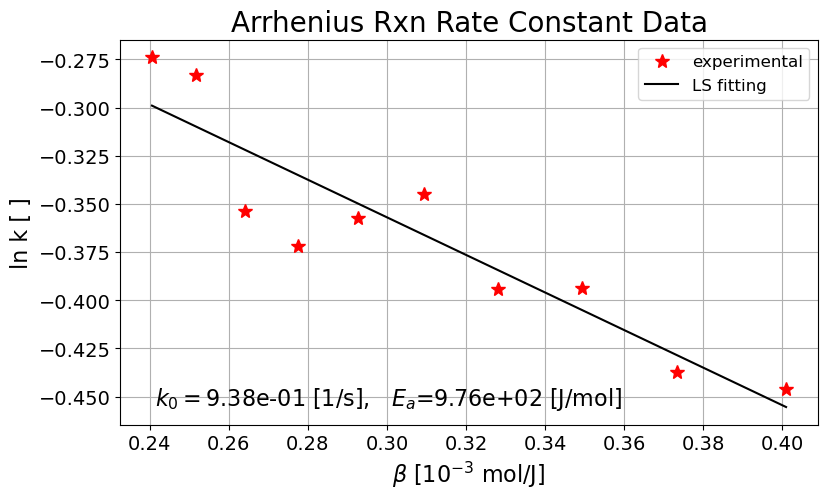

In [11]:
'''Plot the fit in the transformed plane'''

plot_fit_transformed(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

In [12]:
'''Function: plot the fit in the Cartesian plane'''

def plot_fit_cartesian(r_cte, temp, k_cte, k_0, energy_a):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.style.use('dark_background')
    #plt.style.use('classic')
    
    plt.figure(2, figsize=(9, 5))

    # plot experimental data
    plt.plot(temp, k_cte,'r*',label='experimental', markersize=10)

    # plot Arrhenius expression
    n_plot_pts = 100
    temp_plot = np.linspace( temp[0], temp[-1], n_plot_pts)
    k_plot    = k_0 * np.exp(-energy_a/temp_plot/r_cte) # Arrhenius expression
    
    plt.plot(temp_plot,k_plot,'-',color='black', label='LS fitting' )

    plt.xlabel(r'$T$ [K]',fontsize=16)
    plt.ylabel(r'$k$ [s$^{-1}$]',fontsize=16)
    plt.title('Arrhenius Rxn Rate Constant Data',fontsize=20)

    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = x_min + dx*0.07
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_min + dy*0.05
    plt.text(x_text, y_text, r'$k_0=$%8.2e [1/s],   $E_a$=%8.2e [J/mol]'%(k_0,energy_a),fontsize=16)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best',fontsize=12)
    plt.grid(True)
    plt.show()

    return

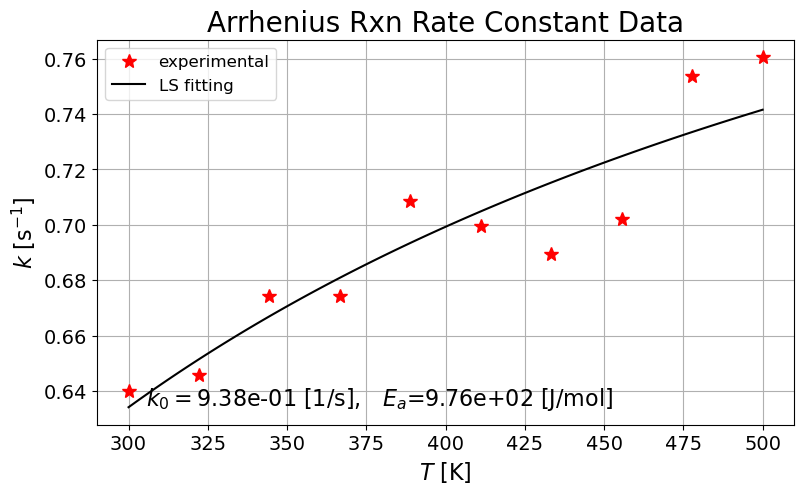

In [13]:
'''Plot the fit in the Cartesian plane'''

plot_fit_cartesian(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

### [Goodness of Fit](#toc)<a id="gof10"></a>

There are different ways to evaluate the goodness of fit. Below is the most direct and relevant error evaluation.
That is, the error on fitting the data as given.

In [14]:
'''Cartesian relative error on reaction rate constant values'''

# Compute the pointwise error
error = np.abs(k_cte_vec - k_0 * np.exp(-energy_a/temp_vec/r_cte)) / k_cte_vec * 100

mean = np.mean(error)
std  = np.std(error)
emax = np.max(error)
emin = np.min(error)

print('Local Relative Error:')
print('mean [%%] = %1.2f'%(mean))
print('std  [%%] = %1.2f'%(std))
print('max, min [%%] = %1.2f, %1.2f'%(emax,emin))

Local Relative Error:
mean [%] = 1.89
std  [%] = 1.05
max, min [%] = 3.74, 0.74


### [LS Residual](#toc)<a id="lsr10"></a>

Let's calculate the residual

\begin{equation*}
\rvec = \bvec - \Amtrx\,\xvec_\text{LS} 
\end{equation*}

and its norm squared at the $\xvec$ point, that is, the objective function of the LS problem:

\begin{equation*}
\phi(\xvec) = \norm{\rvec}^2.
\end{equation*}

Let's show graphically that 

\begin{equation*}
\phi(\xvec_\text{LS}) = \min\limits_{\xvec} \norm{\rvec}^2 ,
\end{equation*}

that is, the least-squares solution sits at the bottom of the objective function surface.

Information on `matplotlib` plots in 3D is found [here](https://matplotlib.org/tutorials/toolkits/mplot3d.html#sphx-glr-tutorials-toolkits-mplot3d-py).

In [17]:
'''Examining the residual'''

r_vec = b_vec - a_mtrx @ x_vec

phi_ls = np.linalg.norm(r_vec)**2

# phi_ls = np.dot(r_vec,r_vec) # alternative dot product

print('phi(x_LS)       = %8.5e'%phi_ls)
print('sqrt(phi(x_LS)) = %8.5e'%math.sqrt(phi_ls))  # norm of the residual vector
print('mean(r_vec)     = %8.5e'%np.mean(r_vec))
print('std(r_vec)      = %8.5e'%np.std(r_vec))
print('')
print('Goodness of fit = %8.5e'%math.sqrt(phi_ls/n_pts))
print('R2              = %8.8e'%(1.0 - np.sum(r_vec**2) / np.sum((x_vec-np.mean(x_vec))**2)))

phi(x_LS)       = 4.61441e-03
sqrt(phi(x_LS)) = 6.79294e-02
mean(r_vec)     = -2.77556e-17
std(r_vec)      = 2.14812e-02

Goodness of fit = 2.14812e-02
R2              = 9.99999990e-01


In [18]:
'''Transformed relative error on log of reaction rate constant values'''

print('Local Relative Error:')
error = np.abs(r_vec/np.log(k_cte_vec))*100
mean = np.mean(error)
std  = np.std(error)
emax = np.max(error)
emin = np.min(error)
print('mean [%%] = %1.2f'%(mean))
print('std  [%%] = %1.2f'%(std))
print('max, min  [%%] = %1.2f, %1.2f'%(emax,emin))

Local Relative Error:
mean [%] = 5.53
std  [%] = 3.38
max, min  [%] = 9.87, 1.96


In [19]:
'''Function: objective function around the minimum'''

def get_objective_function_data(n_plot_pts, a_mtrx, x_vec, b_vec):
    
    import numpy as np
    
    # create the objective function array
    ln_k_0_pts = np.linspace( 0.9*x_vec[0], x_vec[0]*1.1, n_plot_pts )
    energy_pts = np.linspace( 0.9*x_vec[1], x_vec[1]*1.1, n_plot_pts )
    
    phi = np.zeros((n_plot_pts, n_plot_pts))
    
    i = -1
    for ln_k_0 in ln_k_0_pts:
        i += 1
        j = -1
        for e_a in energy_pts:
            j += 1
            res = b_vec - a_mtrx @ np.array( [ln_k_0,e_a] )
            phi[i,j] = np.dot(res, res)
            
    return (ln_k_0_pts, energy_pts, phi)

In [20]:
'''Function: plot the objective function around the minimum'''

def plot_objective_function(objective_function_data):
    
    (ln_k_0_pts, energy_pts, phi) = objective_function_data # unpack the data
            
    # 3D-plot the surface of the objective function
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.style.use('dark_background')
    #plt.style.use('classic')
    
    from matplotlib import cm
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(3, figsize=(5, 5))
    
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    
    #ax.plot_surface(ln_k_0_pts, energy_pts, phi, rstride=1, cstride=1, cmap=cm.plasma)
    ax.plot_surface(ln_k_0_pts, energy_pts, phi, rstride=1, cstride=1)
    
    ax.view_init(azim=10)

    ax.set_xlabel(r'$\ln k_0$ [ ]',fontsize=16)
    ax.set_ylabel(r'$E_a$ [J/mol]',fontsize=16)
    ax.set_zlabel(r'$\phi$',fontsize=16)

    plt.show()
    
    # plot the contour curves of the objective function
    from matplotlib import ticker, cm
    fig, ax = plt.subplots(figsize=(5, 5))
    
    delta = np.min(np.min(phi))/100.0 * 0.06 # 0.06% variation near the minimum
    
    cv = np.linspace(np.min(np.min(phi)) + delta, np.max(np.max(phi)), 10);
    
    cs = ax.contour(ln_k_0_pts, energy_pts, phi, cv)
    
    xpos = x_vec[0]
    ypos = x_vec[1]
    
    plt.text(xpos,ypos,r'* ($\ln k_0$=%5.2e, $E_a$=%5.2e)'%(x_vec[0],x_vec[1]),color='r',fontsize=12);
    
    plt.xlabel(r'$\ln k_0$ []',fontsize=14)
    plt.ylabel(r'$E_a$ [J/mol]',fontsize=14)

    plt.show()
    return

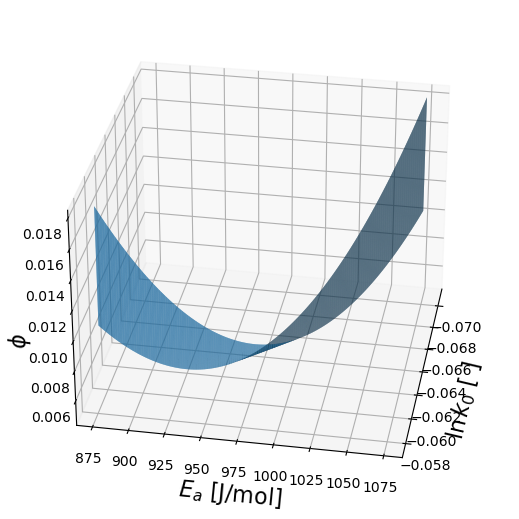

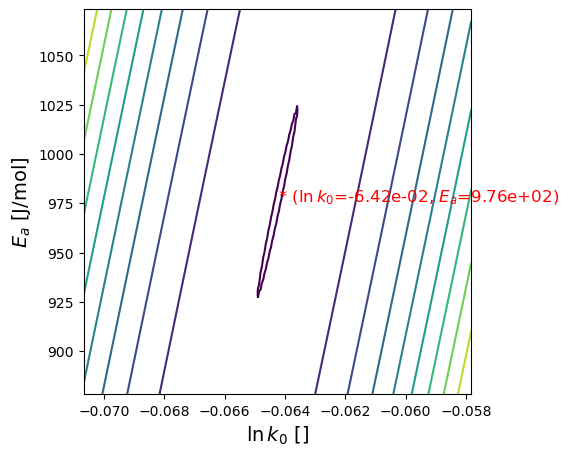

In [21]:
'''Plot the objective function surface around the minimum'''

n_plot_pts = 150

objective_function_data = get_objective_function_data(n_plot_pts, a_mtrx, x_vec, b_vec)

plot_objective_function(objective_function_data)

In [22]:
'''Function: plot the objective function around the minimum'''

#!pip install plotly

def plotly_objective_function(objective_function_data):
    
    (x_vec, y_vec, z_mtrx) = objective_function_data

    import plotly
    import plotly.graph_objs as go

    plotly.offline.init_notebook_mode(connected=True)

    data = [ go.Surface(z=z_mtrx) ]
    layout = go.Layout(
        title='Objective Function Surface',
        autosize=False,
        width=800,
        height=500,
        margin=dict(
            l=40,
            r=40,
            b=40,
            t=40
        )
    )

    plotly.offline.iplot({
        "data": data,
        "layout": layout
    })

In [23]:
'''Plot the objective function around the minimum'''

plotly_objective_function(objective_function_data)

## [Experimental Data (20 points)](#toc)<a id="ed20"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/data). The data is organized in two columns of $T$ versus $k$. For example `data/k_x_T_20pts.dat`:

In [ ]:
!cat 'data/k_x_T_20pts.dat'

In [ ]:
'''Read experimental data'''

(r_cte, r_cte_units, n_pts, temp_vec, k_cte_vec) = read_experimental_data('data/k_x_T_20pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp_vec)
print('k =', k_cte_vec)

In [ ]:
'''Plot experimental data'''

plot_experimental_data(temp_vec, k_cte_vec)

### [Linear System](#toc)<a id="ls20"></a>

In [ ]:
'''Build the matrix system'''

(a_mtrx, b_vec) = build_linear_system( r_cte, temp_vec, k_cte_vec )

print('My rank(A)    =',matrix_rank(a_mtrx, tol=1e-5))
print('NumPy rank(A) =',np.linalg.matrix_rank(a_mtrx))

### [LS Data Fitting](#toc)<a id="lsdf20"></a>

In [ ]:
'''Build and solve the normal equations'''

x_vec = solve(a_mtrx.transpose() @ a_mtrx,
              a_mtrx.transpose() @ b_vec,
              pivoting_option='partial', pivot_tol=1e-8)

np.set_printoptions(precision=3, threshold=100, edgeitems=3)
print('x_vec =', x_vec)

print('||x_vec - NumPy x_vec|| = %1.3e' %
      np.linalg.norm(x_vec - np.linalg.solve(a_mtrx.transpose() @ a_mtrx,
                                             a_mtrx.transpose() @ b_vec)))

import math
k_0      = math.exp(x_vec[0])
energy_a = x_vec[1]

print('k_0 = %8.5e [1/s]'%k_0)
print('E_a = %8.5e [J/mol]'%energy_a)

In [ ]:
'''Plot the fit in the transformed plane'''

plot_fit_transformed(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

In [ ]:
'''Plot the fit in the Cartesian plane'''

plot_fit_cartesian(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

### [Goodness of Fit](#toc)<a id="gof20"></a>

There are different ways to evaluate the goodness of fit. Below is the most direct and relevant error evaluation.
That is, the error on fitting the data as given.

In [ ]:
'''Cartesian relative error on reaction rate constant values'''

# Compute the pointwise error
error = np.abs(k_cte_vec - k_0 * np.exp(-energy_a/temp_vec/r_cte)) / k_cte_vec * 100

mean = np.mean(error)
std  = np.std(error)
emax = np.max(error)
emin = np.min(error)

print('Local Relative Error:')
print('mean [%%] = %1.2f'%(mean))
print('std  [%%] = %1.2f'%(std))
print('max, min [%%] = %1.2f, %1.2f'%(emax,emin))

### [LS Residual](#toc)<a id="lsr20"></a>

In [ ]:
'''Examining the residual'''

r_vec = b_vec - a_mtrx @ x_vec
phi_ls = np.linalg.norm(r_vec)**2

print('phi(x_LS)       = %8.5e'%phi_ls)
print('sqrt(phi(x_LS)) = %8.5e'%math.sqrt(phi_ls))  # norm of the residual vector
print('Mean(r_vec)     = %8.5e'%np.mean(r_vec))
print('STD(r_vec)      = %8.5e'%np.std(r_vec))
print('Goodness of fit = %8.5e'%math.sqrt(phi_ls/n_pts))
print('R2              = %8.5e'%(1.0 - np.sum(r_vec**2) / np.sum((x_vec-np.mean(x_vec))**2)))

In [ ]:
'''Relative error on reaction rate constant values'''

print('Relative Error:')
error = np.abs(r_vec/np.log(k_cte_vec))*100
mean = np.mean(error)
std  = np.std(error)
emax = np.max(error)
emin = np.min(error)
print('mean [%%] = %1.2f'%(mean))
print('std  [%%] = %1.2f'%(std))
print('max, min  [%%] = %1.2f, %1.2f'%(emax,emin))

In [ ]:
'''Plot the objective function surface around the minimum'''

n_plot_pts = 150

objective_function_data = get_objective_function_data(n_plot_pts, a_mtrx, x_vec, b_vec)

plot_objective_function( objective_function_data )

In [ ]:
'''Plot the objective function around the minimum'''

plotly_objective_function(objective_function_data)

## [Experimental Data (80 points)](#toc)<a id="ed80"></a>
Data will be provided for exercises as ASCII files in the `data/` directory of the course [repository](https://github.com/dpploy/chen-3170/data). The data is organized in two columns of $T$ versus $k$. For example `data/k_x_T_80pts.dat`.

In [ ]:
!cat 'data/k_x_T_80pts.dat'

In [ ]:
'''Read experimental data'''

import numpy as np

(r_cte, r_cte_units, n_pts, temp_vec, k_cte_vec) = read_experimental_data('data/k_x_T_80pts.dat')
        
print('R = %4.3f %s'%(r_cte,r_cte_units))
print('m = ',n_pts)
np.set_printoptions(precision=2)
print('T =',temp_vec)
print('k =', k_cte_vec)

In [ ]:
'''Plot experimental data'''

plot_experimental_data(temp_vec, k_cte_vec)

### [Linear System](#toc)<a id="ls80"></a>

In [ ]:
'''Build the matrix system'''

(a_mtrx, b_vec) = build_linear_system( r_cte, temp_vec, k_cte_vec )

print('My rank(A)    =',matrix_rank(a_mtrx, tol=1e-5))
print('NumPy rank(A) =',np.linalg.matrix_rank(a_mtrx))

### [LS Data Fitting](#toc)<a id="lsdf80"></a>

In [ ]:
'''Build and solve the normal equations'''

x_vec = solve(a_mtrx.transpose() @ a_mtrx,
              a_mtrx.transpose() @ b_vec,
              pivoting_option='partial', pivot_tol=1e-8)

np.set_printoptions(precision=3, threshold=100, edgeitems=3)
print('x_vec =', x_vec)

print('||x_vec - NumPy x_vec|| = %1.3e' %
      np.linalg.norm(x_vec - np.linalg.solve(a_mtrx.transpose() @ a_mtrx,
                                             a_mtrx.transpose() @ b_vec)))

import math
k_0 = math.exp(x_vec[0])
energy_a = x_vec[1]

print('k_0 = %8.5e [1/s]'%k_0)
print('E_a = %8.5e [J/mol]'%energy_a)

In [ ]:
'''Plot the fit in the transformed plane'''

plot_fit_transformed(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

In [ ]:
'''Plot the fit in the Cartesian plane'''

plot_fit_cartesian(r_cte, temp_vec, k_cte_vec, k_0, energy_a)

### [Goodness of Fit](#toc)<a id="gof80"></a>

There are different ways to evaluate the goodness of fit this is the most direct and relevant error evaluation.
That is the error on fitting the data as given.

In [ ]:
'''Cartesian relative error on reaction rate constant values'''

# Compute the pointwise error
error = np.abs(k_cte_vec - k_0 * np.exp(-energy_a/temp_vec/r_cte)) / k_cte_vec * 100

mean = np.mean(error)
std  = np.std(error)
emax = np.max(error)
emin = np.min(error)

print('Local Relative Error:')
print('mean [%%] = %1.2f'%(mean))
print('std  [%%] = %1.2f'%(std))
print('max, min [%%] = %1.2f, %1.2f'%(emax,emin))

### [LS Residual](#toc)<a id="lsr80"></a>

In [ ]:
'''Examining the residual'''

r_vec = b_vec - a_mtrx @ x_vec
phi_ls = np.linalg.norm(r_vec)**2

print('phi(x_LS)       = %8.5e'%phi_ls)
print('sqrt(phi(x_LS)) = %8.5e'%math.sqrt(phi_ls))  # norm of the residual vector
print('Mean(r_vec)     = %8.5e'%np.mean(r_vec))
print('STD(r_vec)      = %8.5e'%np.std(r_vec))
print('Goodness of fit = %8.5e'%math.sqrt(phi_ls/n_pts))
print('R2              = %8.5e'%(1.0 - np.sum(r_vec**2) / np.sum((x_vec-np.mean(x_vec))**2)))

In [ ]:
'''Relative error on reaction rate constant values'''

print('Relative Error:')
error = np.abs(r_vec/np.log(k_cte_vec))*100
mean = np.mean(error)
std  = np.std(error)
emax = np.max(error)
emin = np.min(error)
print('mean [%%] = %1.2f'%(mean))
print('std  [%%] = %1.2f'%(std))
print('max, min  [%%] = %1.2f, %1.2f'%(emax,emin))

In [ ]:
'''Plot the objective function surface around the minimum'''

n_plot_pts = 150

objective_function_data = get_objective_function_data(n_plot_pts, a_mtrx, x_vec, b_vec)

plot_objective_function( objective_function_data )

In [ ]:
'''Plot the objective function around the minimum'''

plotly_objective_function(objective_function_data)

## [Results Comparison](#toc)<a id="res"></a>

|            Parameters                 |  10 pts  |  20 pts  | 80 pts   |
| ------------------------------------- | -------- | -------  | -------- |
| Pre-exponential factor, $k_0$, 1/s    | 9.38e-01 | 8.64e-01 | 9.02e-01 |
| Energy of activation, $E_a$, J/mol    | 9.76e+02 | 6.88e+02 | 8.09e+02 |
| Relative error mean [%]               | 1.89     | 2.08     | 1.29     |
| Relative error std [%]                | 1.05     | 1.40     | 0.97     |
| Max. relative error [%]               | 3.74     | 5.38     | 3.65     |